<a href="https://colab.research.google.com/github/tornadiego/Spin-Glass-System/blob/main/Simulated%20Tempering%20for%20EA%20model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center> Spin Glass
*Glassy systems have presented statistical physics with some of its toughest
challenges. Many of the physics world's brightest minds have studied
these problems at various times, but there remain many secrets still to be
uncovered*

---




$ E = -\sum_{\langle i,j \rangle} J_{i,j} \sigma_i \sigma_j$


<center>

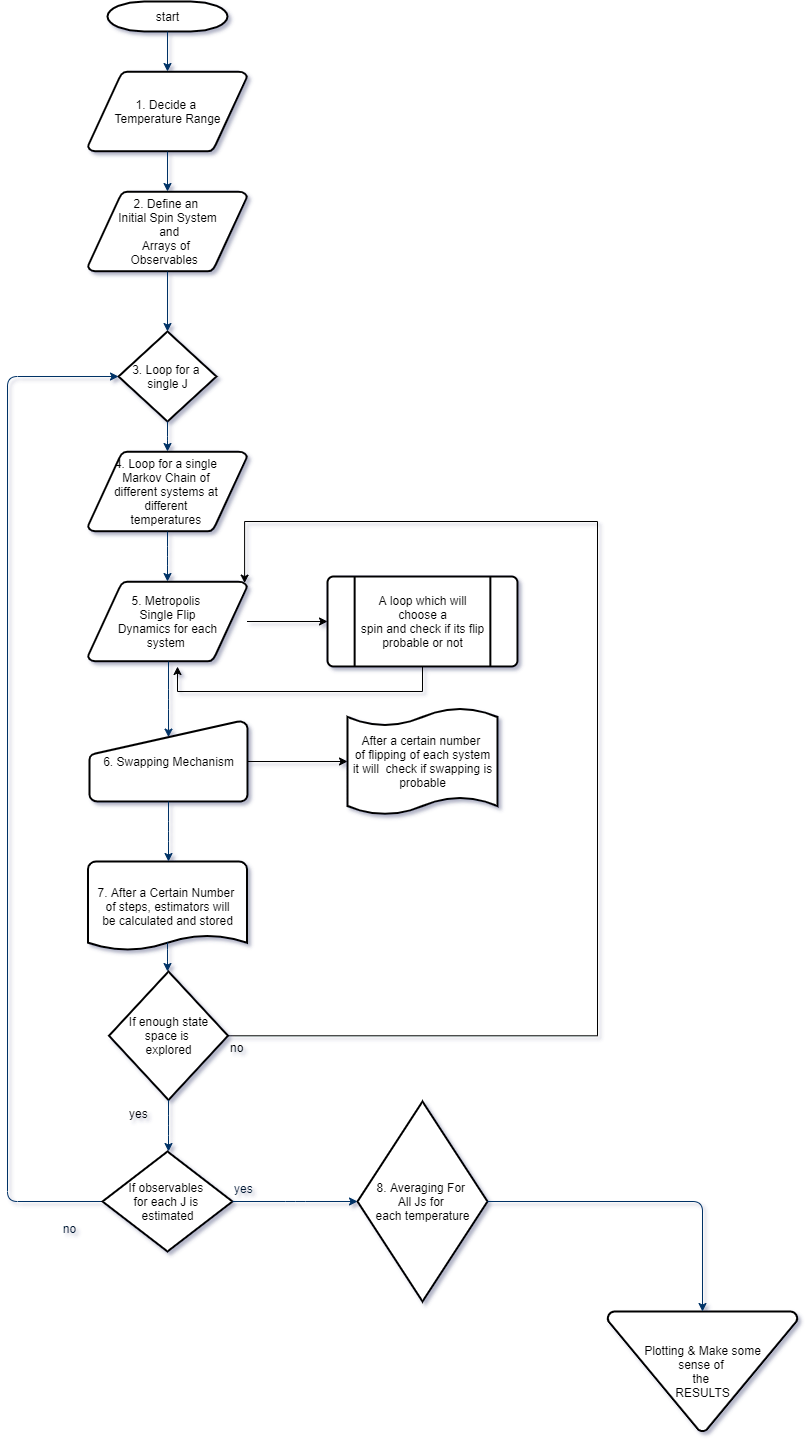

In [ ]:
import numpy as n
import random as r
import matplotlib.pyplot as pl
from tqdm import tqdm

In [ ]:
# Glassy Systems

# Neighbouring positions of a single lattice point for imposing periodic boundary 
def neigh(i,j):
    a,b,c,d=[i,j+1],[i-1,j],[i,j-1],[i+1,j]
 
    
    temp = J[i*N+j]
    #print(i,j,temp)
 
    if (i>=0 and i<N-1) and (j>0 and j<=N-1):
      left = J[i*N+j-1][0]
      down = J[i*(N+1) + j][1]
      #print(i,j)
 
    if i<=0:
        b=[N-1,j]
 
 
    elif i>=N-1:
        d=[0,j]
        
    if j<=0:
        c=[i,N-1]
 
    elif j>=N-1:
        a=[i,0]
 
    left = J[c[0]*N+c[1]][0]
    down = J[d[0]*N + d[1]][1]
    
    temp = n.append(temp , [left,down])
 
    return [a,b,c,d],temp
 
# change in energy due to one flip
def del_e(i,j,spin):
 
  neig,temp = neigh(i,j)
  
  change = 0
 
  for a in range(4):
    change += temp[a]*spin[neig[a][0]][neig[a][1]]  
 
  return change*2*spin[i][j]
 
 
# an array which stores the info about the interaction, basically their spatial distance
def intJ(N):
  J = n.array([[ 1 for j in range (2)] for i in range(N*N) ]) #     #n.random.normal(loc=0.0, scale=1.0, size=[N*N,2])
 
  return J
 
def Energy(spin):
 
  E = 0
  for i in range(N):
    for j in range(N):
 
      neig,temp = neigh(i,j)
      potE = 0
      for a in range(4):
        potE += temp[a]*spin[neig[a][0]][neig[a][1]]  
 
      E += potE*spin[i,j]
  return -E*0.5

In [ ]:
#####################
#constructing an ising spin model
#####################
 
# size in one-d
N = 8
 
# T = infty limit since all are randomly distributed
 
spin = n.array([[ 1.0 for i in range(N)] for j in range (N) ])
 
spin2 = spin.copy()
 
# equilibirum Temperatures
T1 = 0.001
#T2 = 5. 
 
# interactions
J = intJ(N)
 
# Plotting Arrays
 
#change in energies wrt time
En = []
Marr = []
 
k = 0
 
# Importance sampling with simulated tempering way
 
for i in tqdm(range(N*N*1000)):
    a,b = r.randint (0,N-1),r.randint (0,N-1)
    # If we choose (a,b) what would be the change in energy
    dif= del_e(a,b,spin)
    
    # metropolis condition
    if dif <=0 or n.random.uniform() < n.exp(-dif/T1): 
        spin[a][b]*=-1 
        
        E = Energy(spin)
        #k += dif  
        En.append(E)
 
        if (i>100*N):
          M = sum(sum(spin))/(N*N)
          Marr.append(M)

100%|██████████| 64000/64000 [00:04<00:00, 15931.24it/s]


In [ ]:
#####################
#constructing an ising spin model
#####################
 
# size in one-d
N = 5
 
# T = infty limit since all are randomly distributed
 
spin = n.array([[ 1.0 for i in range(N)] for j in range (N) ])
 
# Plotting Arrays
 
#change in energies wrt time
En = n.zeros(N*N)
M=En.copy()
J = intJ(N)
 
k = 0


for i in tqdm(range (N)):
  for j in range (N):

      En[k] = Energy(spin)
      M[k] = sum(sum(spin))
      spin[i][j]*=-1
      k+=1

100%|██████████| 5/5 [00:00<00:00, 151.14it/s]


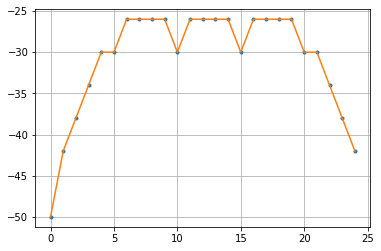

In [ ]:
pl.plot(En,'.')
pl.plot(En)
pl.grid()

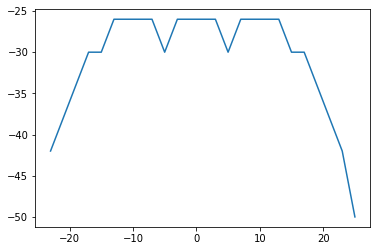

In [ ]:
pl.plot(M,En)

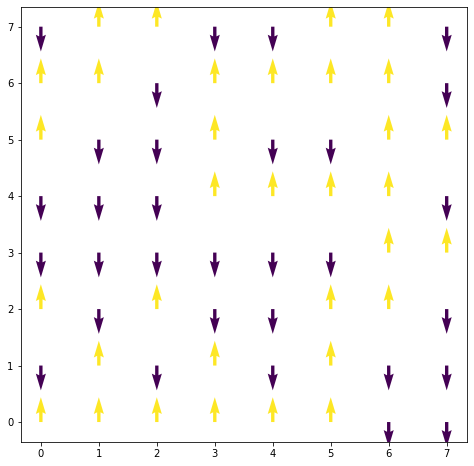

In [ ]:
spin = n.array([[ r.randint(0,1)*2-1 for i in range(N)] for j in range (N) ])
x,y = n.meshgrid(n.arange(N),n.arange(N))
u,v = n.zeros(x.shape), n.ones(y.shape)*spin


pl.figure(figsize=(8,8))
pl.quiver(x,y,u,v,spin.flatten())
#p.quiver(x,y,u,v,init.flatten())
pl.show()


# **THREE DIMENSIONS**

In [ ]:
# DDD
 
# Glassy Systems
 
# Neighbouring positions of a single lattice point for imposing periodic boundary 
 
def neigh(i,j,k,J):
 
    # right, up, left, down, +in, -out
 
    a,b,c,d,e,f = [i,j+1,k],[i-1,j,k],[i,j-1,k],[i+1,j,k], [i,j,k+1],[i,j,k-1]
 
 
    if i<=0:
        b=[N-1,j,k]
 
    elif i>=N-1:
        d=[0,j,k]
       
    if j<=0:
        c=[i,N-1,k]
        
    elif j>=N-1:
        a=[i,0,k]
 
    if k<=0:
        f=[i,j,N-1]
        
    if k>=N-1:
        e=[i,j,0]
 
 
 
    left= J[c[0]*N + c[1] + c[2]*N*N][0]
    down= J[d[0]*N + d[1] + d[2]*N*N][1]
    out=  J[f[0]*N + f[1] + f[2]*N*N][2]
    
 
    # right, up, left, down, +in, -out
    temp = n.array([ J[i*N + j + k*N*N][0] , J[i*N + j + k*N*N][1] , left , down , J[i*N + j + k*N*N][2], out ])
 
    
 
    return [a,b,c,d,e,f],temp
 
# change in energy due to one flip
def del_e(i,j,k,spin,J):
 
  neig,temp = neigh(i,j,k,J)
  
  change = 0
 
  for a in range(6):
    change += temp[a]*spin[neig[a][0]][neig[a][1]][neig[a][2]]
 
  return change*2*spin[i][j][k]
 
 
# an array which stores the info about the interaction, basically their spatial distance
def intJ(N):
  J = n.array([[ r.randint(-1,0)*2+1 for j in range (3)] for i in range(N*N*N) ]) #     #n.random.normal(loc=0.0, scale=1.0, size=[N*N,2])  r.randint(-1,0)*2+1  n.random.normal(loc=0.0, scale=1.0, size=None)
 
  return J
 
 
def Energy(spin,J):
 
  E = 0
  for i in range(N):
    for j in range(N):
      for k in range(N):
        neig,temp = neigh(i,j,k,J)
        potE = 0
        for a in range(6):
          potE += temp[a]*spin[neig[a][0]][neig[a][1]][neig[a][2]]   
 
        E += potE*spin[i,j,k]
  return E*0.5
 
 
def hilo(T1,T2):
  return max(T1,T2),min(T1,T2)

def metro(spin,T,J):  #After using this function, you have to update the configuration

  a,b,c = r.randint(0,N-1),r.randint(0,N-1),r.randint(0,N-1)
  dif = del_e(a,b,c,spin,J)
  M=0

      # metropolis condition
  if dif <=0 or n.random.uniform() < n.exp(-dif/T): 
          spin[a][b][c]*=-1 
          M = 2*spin[a][b][c]
          return dif,M
  else:
    return 0.,0.



def swap(Mval,Eval,T): #Swapping time to include

  pair = r.randint(1,len(T)-1)

  temp = list(n.sort(T))
  


  highT,lowT =  T.index(temp[pair]), T.index(temp[pair-1])
  delE = Eval[highT] - Eval[lowT]

  if (delE <= 0. or n.exp(-(1/T[lowT] - 1/T[highT])*delE) > n.random.uniform()):

    p,E,M                                =  T[lowT], Eval[lowT], Mval[lowT]#, tau[lowT], tauA[lowT]
    T[lowT] , Eval[lowT] , Mval[lowT]    =  T[highT],Eval[highT],Mval[highT]
    T[highT], Eval[highT], Mval[highT]   =  p,E,M

    #print(E,T,'.')

  return T,Eval,Mval
   


In [ ]:
#########################################################################################################
#########################################################################################################
#############################################  MAIN BODY ################################################
#########################################################################################################
#########################################################################################################

# 1. Temperature Range
T1 = list(n.arange(1.,2.,0.05))               #[1.1,1.12, 1.14, 1.20,1.25,1.30,1.35,1.40,1.45,1.50,1.6,1.7,1.8,1.9,2.0,2.2] 

# 2. size in one-d
N = 10
sp = n.array([[[ r.randint(-1,0)*2+1  for i in range(N)] for j in range (N) ] for k in range (N) ])

MJ = n.zeros([len(T1),10]).transpose()
EJ = n.zeros([len(T1),10]).transpose()
Sus = n.zeros([len(T1),10]).transpose()

# Historians
Earr1 = [[]]
Marr1 = [[]]
for i in range(len(T1)):
  Earr1.append([])
  Marr1.append([])  


for k in range(10):

  T=T1

  J1 = intJ(N)
  Earr = Earr1.copy()
  Marr = Marr1.copy()

  spin = [] 

  for pk in range(len(T)): spin.append(sp.copy())

  M = sum(sum(sum(sp)))
  E = Energy(sp,J1)

  Emain = n.ones(len(T))*E                        #Storing instantaneous energies of a state at each temperature
  Mmain = n.ones(len(T))*M

  for i in tqdm(range(1, int(N*N*N*500))):   #THE BIG LOOP

    # 5. This is for metropolis 
    for j in range(len(T)): 
      E,M = metro(spin[j],T[j],J1)
      Emain[j] += E
      Mmain[j] += M

    # 6. Swapping 
    if  i%2000 == 0:  T,Mmain,Emain = swap(Mmain, Emain, T)
      
    # 7. Estimators Calculation
    if (i>N*N*N*500/1.25):
      temp=n.argsort(T)
      count=0
      for j in temp:
        Earr[count].append(Emain[j])
        Marr[count].append(Mmain[j])
        count+=1

  # 8. Averaging for different Js
  for j in range(len(T)):

    MJ[k][j] = n.mean(Marr[j])
    EJ[k][j] = n.mean(Earr[j])
    Mar = (n.array(Marr[j]))/N**3
    Sus[k][j] = (sum(Mar*Mar)/len(Mar)- (sum(Mar)/len(Mar))**2 )/(T[j])

100%|██████████| 1687499/1687499 [18:58<00:00, 1482.01it/s]


In [ ]:
n.array([1,23,4,5,56,768,79,85,3])*n.array([1,23,4,5,56,768,79,85,3])

array([     1,    529,     16,     25,   3136, 589824,   6241,   7225,
            9])

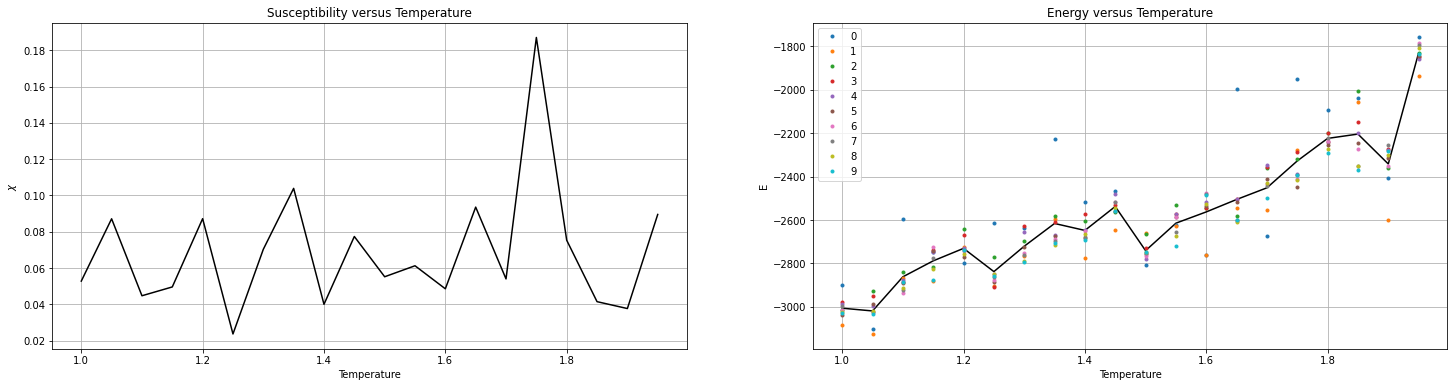

In [ ]:

pl.figure(figsize = (25,6))
pl.subplot(121)
pl.title ("Susceptibility versus Temperature")
pl.plot(n.sort(T), n.mean(Sus,axis=0),color = 'black' )
pl.grid()

pl.xlabel("Temperature")
pl.ylabel("$\chi$")
pl.subplot(122)
pl.title ("Energy versus Temperature")
pl.plot(n.sort(T), n.mean(EJ,axis=0),color = 'black' )
for i in range(10): 
  pl.plot(n.sort(T),EJ[i],'.',label=str(i))
pl.xlabel("Temperature")
pl.ylabel("E")
pl.legend()
pl.grid()
pl.show()